# Clase 2: Introducción a Scikit-Learn y Aplicación

En este notebook vamos a profundizar sobre los siguientes temas vistos hasta la clase 2 con foco en ponerlos en práctica. Este notebook trabaja sobre:

- Introducción a Scikit-learn
- Feature engineering (imputaciones, encodings, preprocesamientos)
- Validación cruzada
- Métricas
- Regresión lineal
- Introducción a modelos basados en árboles

In [1]:
import pandas as pd
import numpy as np

## Bajemos unos datos!

In [2]:
# Obtenemos el dataset del repositorio original del libro
URL = 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv'
insurance_data = pd.read_csv(URL)


In [3]:
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Veamos si hay datos faltantes, y algunas estadísticas descriptivas de cada atributo:

In [4]:
insurance_data.describe(include="all")

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


No hay datos faltantes! Introduzcamos algunos:

In [5]:
insurance_data_with_missing = insurance_data.copy()
insurance_data_with_missing.loc[np.random.random(len(insurance_data)) < 0.05, "bmi"] = np.nan
insurance_data_with_missing.describe(include="all")

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1268.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.595134,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.119263,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.220000,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.275000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.485000,2.000000,NaN,NaN,16639.912515


## Separación en train y test

Para evitar sesgos, no sólo el entrenamiento del modelo debe ser sobre un subconjunto de los datos apartado. También los análisis que hagamos y el feature engineering que implementemos.

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
train, test = train_test_split(
    insurance_data_with_missing, 
    test_size=0.3, 
    random_state=42, 
    shuffle=True
)
train.head()

,age,sex,bmi,children,smoker,region,charges
332,61,female,31.160,0,no,northwest,13429.03540
355,46,male,27.600,0,no,southwest,24603.04837
138,54,female,31.900,3,no,southeast,27322.73386
381,55,male,30.685,0,yes,northeast,42303.69215
292,25,male,45.540,2,yes,southeast,42112.23560


In [8]:
train.describe(include="all")

,age,sex,bmi,children,smoker,region,charges
count,936.00000,936,893.000000,936.000000,936,936,936.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,480,NaN,NaN,741,244,NaN
mean,39.19765,NaN,30.487800,1.108974,NaN,NaN,13379.157307
std,14.12399,NaN,6.006687,1.212627,NaN,NaN,12108.882855
min,18.00000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.00000,NaN,26.220000,0.000000,NaN,NaN,4819.842913
50%,39.00000,NaN,30.200000,1.000000,NaN,NaN,9526.937700
75%,52.00000,NaN,34.400000,2.000000,NaN,NaN,17222.181875


## Imputación de datos

Imputemos los datos faltantes con un promedio:

In [9]:
from sklearn.impute import SimpleImputer

In [10]:
imp = SimpleImputer(missing_values=np.nan, strategy="mean")
train.loc[:, "bmi"] = imp.fit_transform(train.loc[:, ["bmi"]])

/home/joaquintz/.cache/pypoetry/virtualenvs/wingman-ugQROf-l-py3.8/lib/python3.8/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Ahora vemos que están todos los datos para BMI:

In [11]:
train.describe(include="all")

,age,sex,bmi,children,smoker,region,charges
count,936.00000,936,936.00000,936.000000,936,936,936.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,480,NaN,NaN,741,244,NaN
mean,39.19765,NaN,30.48780,1.108974,NaN,NaN,13379.157307
std,14.12399,NaN,5.86694,1.212627,NaN,NaN,12108.882855
min,18.00000,NaN,15.96000,0.000000,NaN,NaN,1121.873900
25%,27.00000,NaN,26.41000,0.000000,NaN,NaN,4819.842913
50%,39.00000,NaN,30.48780,1.000000,NaN,NaN,9526.937700
75%,52.00000,NaN,34.20000,2.000000,NaN,NaN,17222.181875


## Encodings y preprocesamiento

Si vamos a utilizar una regresión lineal no podemos pasarle los atributos categóricos. Para no descartar esa información, deberíamos aplicar algún encoding:

In [12]:
from sklearn import preprocessing

### One Hot Encoding

In [35]:
train.loc[:, ["smoker", "region", "sex"]]

,smoker,region,sex
332,no,northwest,female
355,no,southwest,male
138,no,southeast,female
381,yes,northeast,male
292,yes,southeast,male
...,...,...,...
1095,no,northeast,female
1130,no,southeast,female
1294,no,northeast,male
860,yes,southwest,female


In [13]:
ohe = preprocessing.OneHotEncoder(drop="if_binary", sparse=False)
ohe.fit_transform(train.loc[:, ["smoker", "region", "sex"]])

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 1.]])

### Escalado

Como la regresión lineal no puede ajustar una ordenada por cada variable, si una variable no está normalizada puede ser más difícil de utilizar:

In [14]:
ss = preprocessing.StandardScaler()
ss.fit_transform(train.loc[:, ["age", "bmi", "children"]])

array([[ 1.54446486,  0.11463554, -0.91501097],
       [ 0.48187425, -0.49247879, -0.91501097],
       [ 1.04858924,  0.24083346,  1.56027883],
       ...,
       [ 1.33194673, -0.9060328 , -0.91501097],
       [-0.15568012,  2.91827588,  0.73518223],
       [ 1.11942861, -0.100242  , -0.91501097]])

## Nuevas variables

Tal vez es útil para el modelo codificar directamente si una persona no tiene hijos:

In [15]:
train.loc[:, "children"] < 1

332      True
355      True
138     False
381      True
292     False
        ...  
1095    False
1130    False
1294     True
860     False
1126     True
Name: children, Length: 936, dtype: bool

## La forma estándar

La forma fácil para entrenar un modelo tras todos estos pasos de feature engineering es armar un dataframe con las columnas nuevas y luego hacer el fit-transform.

## La forma linda

In [16]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression


def add_child_free_column(col):
    return col < 1

scale_and_impute = Pipeline(
    [
        ("mean_imputer", SimpleImputer(missing_values=np.nan, strategy="mean")),
        ("scaler", preprocessing.StandardScaler()),
    ]
)

ct = ColumnTransformer(
    [
        ("impute_and_scale", scale_and_impute, ["bmi"]),
        ("scaler", preprocessing.StandardScaler(), ["age", "children"]),
        ("one_hot_encoder", preprocessing.OneHotEncoder(), ["smoker", "region", "sex"]),
        ("feature_adder", preprocessing.FunctionTransformer(add_child_free_column), ["children"])
        # también: drop o passthrough
    ]
)

pipeline = Pipeline([
    ("column_transformer", ct),
    ("linear_regression", LinearRegression())
])

In [17]:
ct.fit_transform(train).shape

(936, 12)

In [18]:
# pipeline.inverse_transform (!!!)

In [19]:
train.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [20]:
pipeline.fit(train, train.charges)

Pipeline(steps=[('column_transformer',
                 ColumnTransformer(transformers=[('impute_and_scale',
                                                  Pipeline(steps=[('mean_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['bmi']),
                                                 ('scaler', StandardScaler(),
                                                  ['age', 'children']),
                                                 ('one_hot_encoder',
                                                  OneHotEncoder(),
                                                  ['smoker', 'region', 'sex']),
                                                 ('feature_adder',
                                                  FunctionTransfo

In [21]:
pipeline.predict(train)[:10]

array([13898.5462861 ,  8434.0409866 , 13121.92158304, 36457.00650495,
       33649.44788153, 35286.23062745,  5908.91826361,  6393.39168612,
       16435.51629781,  8445.25849782])

In [22]:
pipeline.predict(test)[:10]

array([ 9.09743735e+03,  6.98094807e+03,  3.68926825e+04,  9.45917863e+03,
        2.69583073e+04,  1.11076018e+04, -2.86082153e+01,  1.70819256e+04,
        1.05393646e+03,  1.12513631e+04])

In [23]:
from sklearn import set_config
set_config(display="diagram")
pipeline
#set_config(display="text")

Pipeline(steps=[('column_transformer',
                 ColumnTransformer(transformers=[('impute_and_scale',
                                                  Pipeline(steps=[('mean_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['bmi']),
                                                 ('scaler', StandardScaler(),
                                                  ['age', 'children']),
                                                 ('one_hot_encoder',
                                                  OneHotEncoder(),
                                                  ['smoker', 'region', 'sex']),
                                                 ('feature_adder',
                                                  FunctionTransformer(func=<function add_child_free_column at 0x7fc04ea95a60>),
                                                  ['children'])])),
                ('linear_regression', LinearRegression())])

¿Cuáles son los beneficios de usar un pipeline?

- Facilita la reproducibilidad
    - No son celdas separadas: se corre siempre el mismo pipeline
    - Deshabilitar un paso o agregar otro es trivial
    - Es más fácil pasar el código de un notebook a una aplicación (cli, web app, etc.)
- Es imposible fittear parámetros del feature engineering sobre los datos de test
- Evita la duplicación de código y el código _espagueti_ 

¿Cuáles son las desventajas?

- Para iterar al principio puede ser más lento
- Perdemos el detalle del paso a paso

### Métricas

In [24]:
train_preds = pipeline.predict(train)
test_preds = pipeline.predict(test)

In [25]:
from sklearn import metrics

def get_pipeline_preds(pipeline, train, test):
    train_preds = pipeline.predict(train)
    test_preds = pipeline.predict(test)
    return train_preds, test_preds

def print_metrics(train, train_preds, test, test_preds):

    print(f"Train MAE: {metrics.mean_absolute_error(train_preds, train.charges):.2f}", )
    print(f"Test MAE: {metrics.mean_absolute_error(test_preds, test.charges):.2f}")

    print(f"Train R2: {metrics.r2_score(train_preds, train.charges):.2f}", )
    print(f"Test R2: {metrics.r2_score(test_preds, test.charges):.2f}")

train_preds, test_preds = get_pipeline_preds(pipeline, train, test)
print_metrics(train, train_preds, test, test_preds)

Train MAE: 4256.67
Test MAE: 4096.97
Train R2: 0.65
Test R2: 0.69


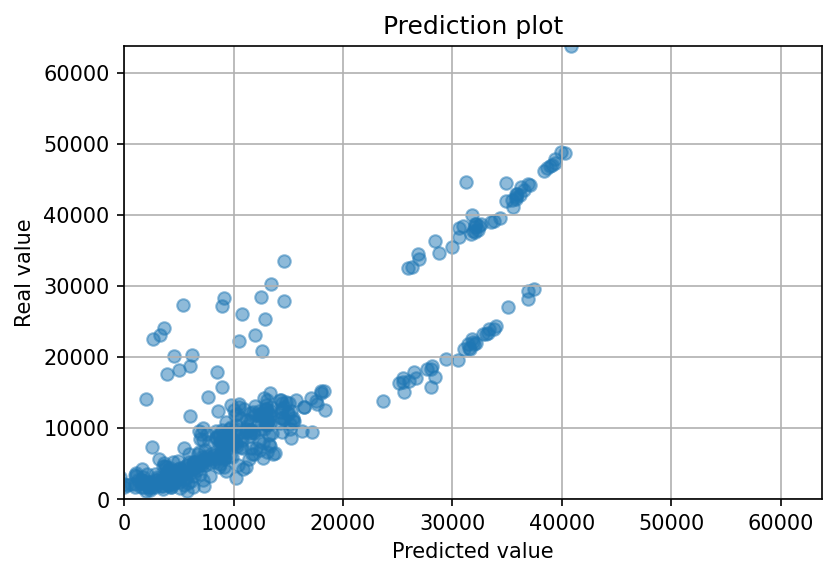

In [26]:
from matplotlib import pyplot as plt

plt.figure(dpi=150, facecolor="white")
plt.scatter(test_preds, test.charges, alpha=0.5)
max_val = max(test_preds.max(), test.charges.max())
plt.ylim(0, max_val)
plt.xlim(0, max_val)
plt.title("Prediction plot")
plt.xlabel("Predicted value")
plt.ylabel("Real value")
plt.grid()


## Usando validación cruzada

In [27]:
from sklearn.model_selection import cross_val_score

val_scores = cross_val_score(
    pipeline, 
    train, 
    train.charges, 
    cv=5, 
    scoring=metrics.make_scorer(metrics.mean_absolute_error)
)
val_scores

array([4279.63420998, 4339.50324439, 4543.2879993 , 4361.74906216,
       4027.40295033])

In [28]:
np.mean(val_scores)

4310.315493232167

## Usando random forests

### No nos perdamos el árbol por ver el bosque

Supongamos que queremos predecir los gastos médicos de un paciente basándonos en la edad y el índice de masa corporal de los pacientes (como en la figura de abajo).

Para construir un modelo de árbol de decisión que nos permita realizar esta predicción debemos seguir los siguientes pasos:

* Definir un conjunto de regiones diviendo los pacientes por sus valores en alguno de estos atributos.
* Dentro de las regiones resultantes tomar como valor predicho de los gastos de un paciente al promedio de los gastos de todos los pacientes en esa región.
 
A su vez se puede continuar iterando este algoritmo elegiendo otro atributo o el mismo y particionando cada región en subregiones.
Este particionamiento define o puede ser representado como una estructura de árbol:

* Las regiones son los nodos terminales u hojas
* Los valores utilizados para partir al espacio de atributos son los nodos internos.
* Las aristas que conectan los nodos son las ramas.


![tree](https://camo.githubusercontent.com/e7d9b43466790d6e5fe9f1bc70660ac6d631509d3ec714d23a6d82945d620fc5/68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f7065746f62656e732f696e74726f64756363696f6e2d6d6c2d61706c696361646f2f6d61737465722f666967757265732f6465636973696f6e2d747265652f73696d706c655f747265652e706e67)

![tree-cartesian](https://camo.githubusercontent.com/76c33de54fea918c4f433c2642fe94748a088356c6094773c076c17cdb212997/68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f7065746f62656e732f696e74726f64756363696f6e2d6d6c2d61706c696361646f2f6d61737465722f666967757265732f6465636973696f6e2d747265652f747265655f726567696f6e732e706e67)

¿Cómo definimos un poco más formalmente las regiones para construir un árbol?

Buscamos "rectangulos" (o cajas) $R_{1}, R_{2}, \cdots, R_{J}$ que minimicen el ECM

$$\sum_{j=1}^{J}\sum_{i\in R_{j}}(y_{i} - \hat{y}_{R_{j}})^{2}$$
 

Para ello tomamos un enfoque top-down y greedy  -- empezamos con todas las observaciones en una única región y en cada etapa hacemos la mejor partición posible.


1. Elegimos la variable $X_{j}$ y punto de corte $s$ tal que partir el espacio de atributos en regiones $\{X|X_{j} < s\}$ y $\{X|X_{j} >= s\}$ minimice el ECM
2. Repetimos 1. para cada sub-region resultante hasta cumplir algún criterio de parada (por ejemplo una cota mínima de observaciones en cada región)


#### Propuesta de ejercicio

Como ejercicio, adaptar el Pipeline anterior para fittear un árbol. Identificar cuáles pasos de feature engineering no son necesarios para este modelo y eliminarlos.

Como referencia para armar un árbol y visualizarlo, se puede ver la documentación de scikit-learn: https://scikit-learn.org/stable/modules/tree.html

### Ahora: el bosque

![rf](https://www.tibco.com/sites/tibco/files/media_entity/2021-05/random-forest-diagram.svg)

In [29]:
from sklearn.ensemble import RandomForestRegressor
pipeline_rf = Pipeline([
    ("column_transformer", ct),
    ("forest", RandomForestRegressor(n_estimators=100))
])


In [30]:
pipeline_rf.fit(train, train.charges)
;

''

In [31]:
train_preds, test_preds = get_pipeline_preds(pipeline_rf, train, test)

print_metrics(train, train_preds, test, test_preds)

Train MAE: 1063.69
Test MAE: 2501.51
Train R2: 0.97
Test R2: 0.84


### Buscando hiperparámetros con validación cruzada para evitar overfitting

In [32]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "forest__n_estimators": [5, 10, 50, 100]
}
search = GridSearchCV(pipeline_rf, param_grid, n_jobs=1, scoring=metrics.make_scorer(metrics.mean_absolute_error))
search.fit(train, train.charges)

GridSearchCV(estimator=Pipeline(steps=[('column_transformer',
                                        ColumnTransformer(transformers=[('impute_and_scale',
                                                                         Pipeline(steps=[('mean_imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['bmi']),
                                                                        ('scaler',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'children']),
                                                                        ('one_hot_encoder',
                                                                         OneHotEncoder(),
                                                                         ['smoker',
                                                                          'region',
                                                                          'sex']),
                                                                        ('feature_adder',
                                                                         FunctionTransformer(func=<function add_child_free_column at 0x7fc04ea95a60>),
                                                                         ['children'])])),
                                       ('forest', RandomForestRegressor())]),
             n_jobs=1, param_grid={'forest__n_estimators': [5, 10, 50, 100]},
             scoring=make_scorer(mean_absolute_error))

In [33]:
search.best_params_

{'forest__n_estimators': 5}

In [34]:
search.cv_results_

{'mean_fit_time': array([0.02253704, 0.03116913, 0.12622595, 0.22597389]),
 'std_fit_time': array([0.00096223, 0.00118178, 0.00887554, 0.01085219]),
 'mean_score_time': array([0.00649552, 0.00688915, 0.01224527, 0.01589742]),
 'std_score_time': array([0.00041623, 0.00024126, 0.00257812, 0.00059229]),
 'param_forest__n_estimators': masked_array(data=[5, 10, 50, 100],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'forest__n_estimators': 5},
  {'forest__n_estimators': 10},
  {'forest__n_estimators': 50},
  {'forest__n_estimators': 100}],
 'split0_test_score': array([3168.54442738, 2864.20313396, 2849.86307795, 2725.91794228]),
 'split1_test_score': array([2926.43155184, 3098.16857062, 2900.70501521, 2916.60184673]),
 'split2_test_score': array([3379.63229984, 3236.7732595 , 3191.46780545, 3083.32171915]),
 'split3_test_score': array([3288.74746395, 3009.05045634, 3054.657459  , 3051.11079236]),
 'split4_test_score': array

## Ejercicio

Utilizando lo aprendido en este notebook, te pedimos desarollar un pipeline para predecir el precio de casas del _Ames Housing dataset_.

El link a la competencia es el siguiente: https://www.kaggle.com/c/home-data-for-ml-course/data

Un buen primer paso es explorar los datos, y después fittear un modelo sencillo a partir del cual podemos obtener el error de base (baseline).

Luego, avanzar con feature engineering progresivamente y verificando como varía la métrica de performance.

Eventualmente, cuando estés satisfecho con la performance, podés bajar el archivo test.csv de la competencia y verificar la capacidad de generalización del modelo.

Como paso final se puede enviar las predicciones a la competencia siguiendo el formato descripto en la misma: https://www.kaggle.com/c/home-data-for-ml-course/overview/evaluation

Para esto hay que generar un archivo CSV con el formato designado y subirlo manualmente a https://www.kaggle.com/c/home-data-for-ml-course/submit